### Problem Statement ###
**You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.** 

In [1]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing csv file:

df = pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the number of records and columns:
df.shape

(730, 16)

In [4]:
# checking the size of the dataset:
df.size # 730 X 16 = 11680

11680

In [5]:
# checking data type and null values (if any) of the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# We can see that there are no null values in all the 16 columns which is good as we do not have to handle null values anymore.

## Column Descriptions ##

**The dataset 'day.csv' have the following fields:**<br>
- instant: record index <br>
- dteday : date <br>
- season : season (1:spring, 2:summer, 3:fall, 4:winter) <br>
- yr : year (0: 2018, 1:2019)<br>
- mnth : month ( 1 to 12)<br>
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) <br>
- weekday : day of the week <br>
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. <br>
- weathersit : 
	1. Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
	4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
- temp : temperature in Celsius <br>
- atemp: feeling temperature in Celsius <br>
- hum: humidity <br>
- windspeed: wind speed <br>
- casual: count of casual users <br>
- registered: count of registered users <br>
- cnt: count of total rental bikes including both casual and registered

In [7]:
# Creating a rough-work of what I want to do with this dataset:

# remove casual and registered
# built multiple models. Get a final model
# map back categorical values --> for EDA
# uni, bi and multi-variate analysis
# dummy for all categories > 2 categories
# scaling --> mim-max scaler

In [8]:
# We will do 2 things:
# 1) Create a copy of the dataset and reverse the label encoding to gather insights (EDA)
# 2) Build model after non-relevant feature elimination for total count prediction using the original dataset 

In [9]:
# 1) Create a copy of the dataset and reverse the label encoding to gather insights
df_viz = df.copy() 

In [10]:
df_viz.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Setting to max rows:
pd.set_option('display.max_rows',None)

In [12]:
# Checking uniaue values for instant: 
df_viz.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
df_viz.instant.value_counts()

1      1
480    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
481    1
479    1
502    1
478    1
459    1
460    1
461    1
462    1
463    1
464    1
465    1
466    1
467    1
468    1
469    1
470    1
471    1
472    1
473    1
474    1
475    1
476    1
477    1
501    1
503    1
548    1
526    1
528    1
529    1
530    1
531    1
532    1
533    1
534    1
535    1
536    1
537    1
538    1
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
527    1
525    1
504    1
524    1
505    1
506    1
507    1
508    1
509    1
510    1
511    1
512    1
513    1
514    1
515    1
516    1
517    1
518    1
519    1
520    1
521    1
522    1
523    1
458    1
457    1
456    1
389    1
391    1
392    1
393    1
394    1
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    1
403    1
404    1
405    1
406    1
407    1
4

In [14]:
df_viz['instant'].nunique()

730

In [15]:
df.shape[0]

730

In [16]:
# The above column is a unique ID column. Lets drop it. Not required for EDA in our case.
df_viz = df_viz.drop(['instant'],axis=1)

In [17]:
df_viz.dteday.unique() 

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

In [18]:
# From the above note that the date is in Indian format i.e; DD-MM-YYYY. So, convert accordingly from int to datetime.

In [19]:
# Lets derive day, month and year from the dteday column and then drop the original date column:
df['dteday'] = pd.to_datetime(df_viz['dteday'], dayfirst=True)
df_viz['date_day'] = df['dteday'].dt.day
df_viz['date_yr'] = df['dteday'].dt.year
df_viz['date_mnth'] = df['dteday'].dt.month

In [20]:
# Now lets drop the dteday column since year and month has already been given in default columns separately:
df_viz = df_viz.drop(['dteday'],axis=1)

In [21]:
df_viz.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,2018,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,2018,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,2018,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,2018,1


In [22]:
# Now lets drop the original yr and mnth columns:
df_viz = df_viz.drop(['yr','mnth'],axis=1) # Dropping yr will save time since we do not have to reverse the label encoding in yr.

In [23]:
df_viz.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,2018,1


In [24]:
# Checking whether 0 refers to 'Sunday' or 'Monday':
df_viz[['weekday','workingday']]

,weekday,workingday
0,6,0
1,0,0
2,1,1
3,2,1
4,3,1
5,4,1
6,5,1
7,6,0
8,0,0
9,1,1


In [25]:
# Now lets reverse label encode to derive meaningful data visualizations:
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                   4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df_viz['weekday'] = df_viz['weekday'].map(weekday_mapping) 

In [26]:
df_viz.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,1,0,Sunday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018,1
1,1,0,Monday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,2018,1
2,1,0,Tuesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,2018,1
3,1,0,Wednesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,2018,1
4,1,0,Thursday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,2018,1


In [27]:
workingday_mapping = {0: 'No', 1: 'Yes'}
df_viz['workingday'] = df_viz['workingday'].map(workingday_mapping) 

In [28]:
df_viz.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,1,0,Sunday,No,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018,1
1,1,0,Monday,No,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,2018,1
2,1,0,Tuesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,2018,1
3,1,0,Wednesday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,2018,1
4,1,0,Thursday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,2018,1


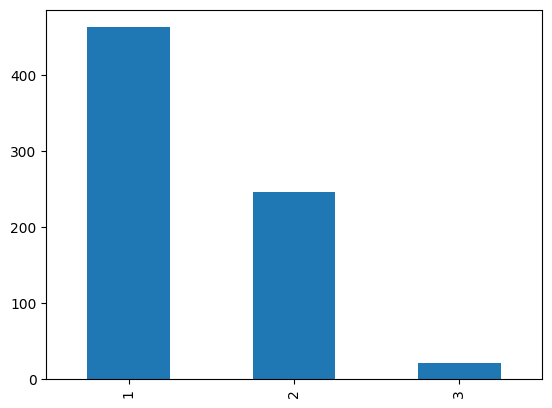

In [29]:
df_viz.weathersit.value_counts().plot(kind='bar')
plt.show()

In [30]:
# Reverse label encoding the weathersit column:
# Note that each category contains multiple sub-categories, therefore for simplification we have taken a more characteristic one
# from each category that can be easily understood:
weathersit_mapping = {1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'} 
df_viz.weathersit = df_viz.weathersit.map(weathersit_mapping)

In [31]:
# Reverse label encoding the holiday column: 
holiday_mapping = {0: 'No', 1: 'Yes'} 
df_viz['holiday'] = df_viz['holiday'].map(workingday_mapping) 

In [32]:
# Reverse label encoding the season column: 
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'} 
df_viz['season'] = df_viz['season'].map(season_mapping) 

In [33]:
# Converting date_mnth column records from number to 'month name' for convenience:
# For this I am going to use the calender module to fetch all the month names instead of using a dictionary that has to 
# be manually written

import calendar

df_viz['date_mnth'] = df_viz['date_mnth'].apply(lambda x: calendar.month_name[x])

In [34]:
df_viz.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,spring,No,Sunday,No,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,2018,January
1,spring,No,Monday,No,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2,2018,January
2,spring,No,Tuesday,Yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,2018,January
3,spring,No,Wednesday,Yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,2018,January
4,spring,No,Thursday,Yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,2018,January


In [35]:
df_viz.columns

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'date_day',
       'date_yr', 'date_mnth'],
      dtype='object')

In [36]:
# Also lets round to 3 digits (after decimal) all the numeric columns in float for simplification:
round_col = ['temp', 'atemp', 'hum', 'windspeed']

for col in round_col:
    df_viz[col] = df_viz[col].round(3)

In [37]:
df_viz.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_day,date_yr,date_mnth
0,spring,No,Sunday,No,mist,14.111,18.181,80.583,10.750,331,654,985,1,2018,January
1,spring,No,Monday,No,mist,14.903,17.687,69.609,16.652,131,670,801,2,2018,January
2,spring,No,Tuesday,Yes,clear,8.051,9.470,43.727,16.637,120,1229,1349,3,2018,January
3,spring,No,Wednesday,Yes,clear,8.200,10.606,59.044,10.740,108,1454,1562,4,2018,January
4,spring,No,Thursday,Yes,clear,9.305,11.464,43.696,12.522,82,1518,1600,5,2018,January


In [38]:
# Lets do all the visualizations for EDA:

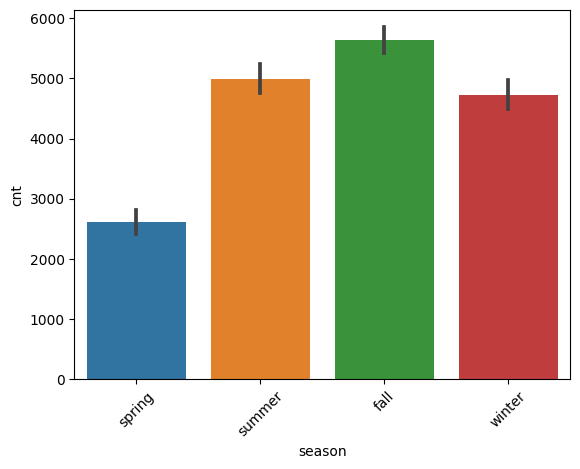

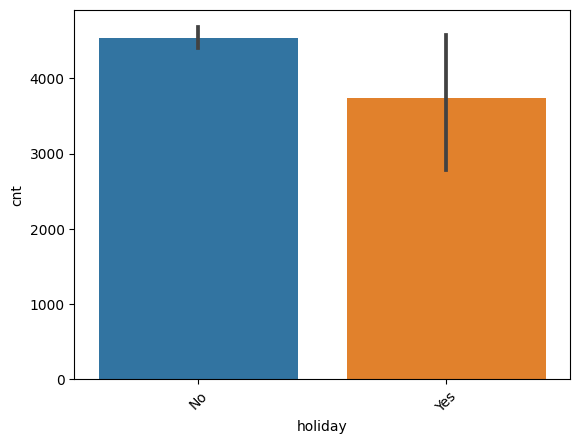

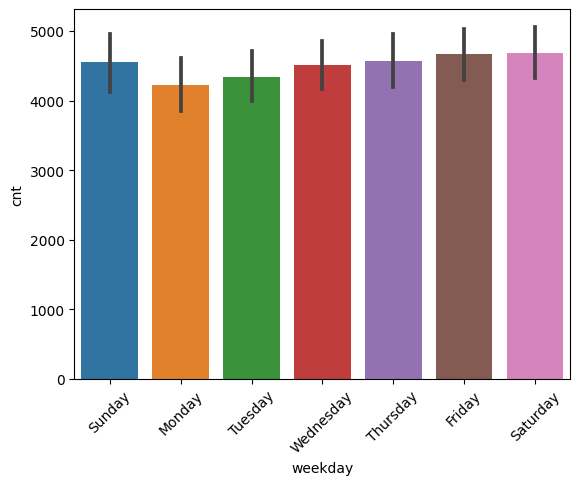

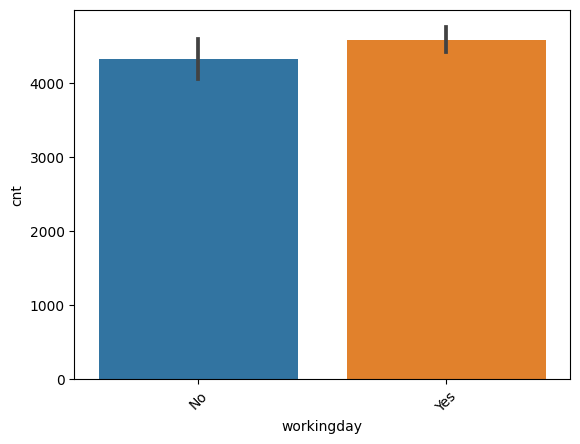

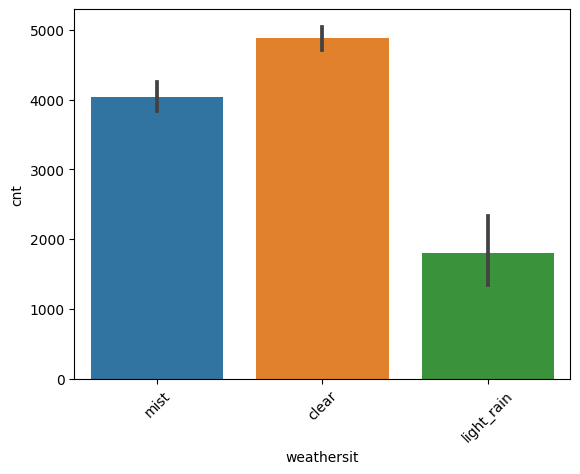

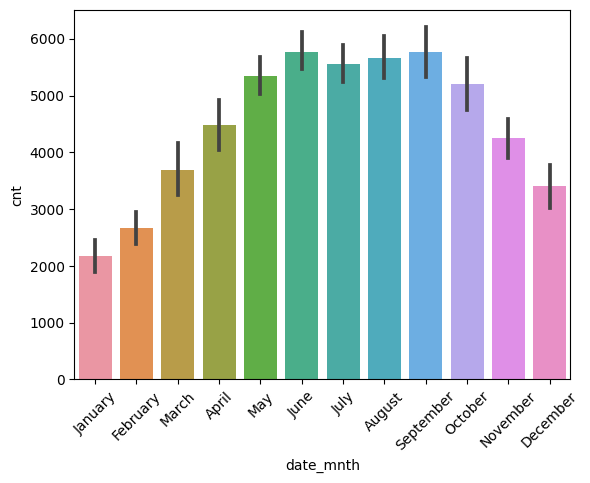

In [39]:
# Lets draw all the categorical visualizations together:
for col in df_viz.columns:
    if df_viz[col].dtype == 'object':
        sns.barplot(x=df_viz[col],y=df_viz['cnt'],data=df_viz)
        plt.xticks(rotation=45)
        plt.show()

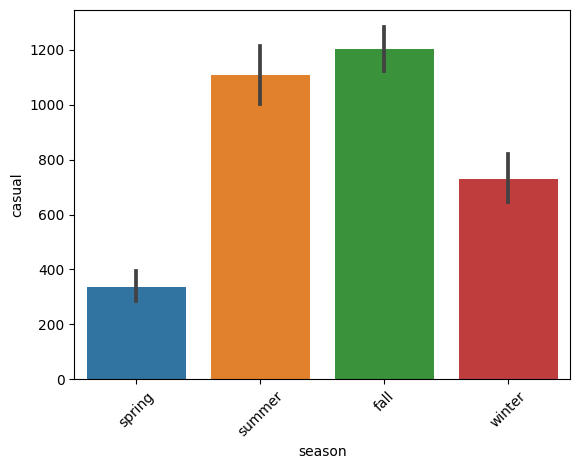

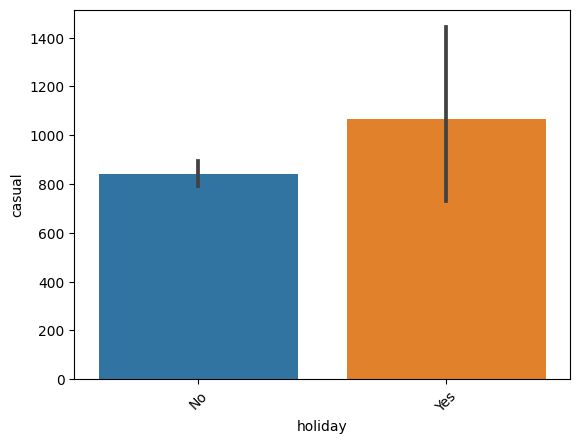

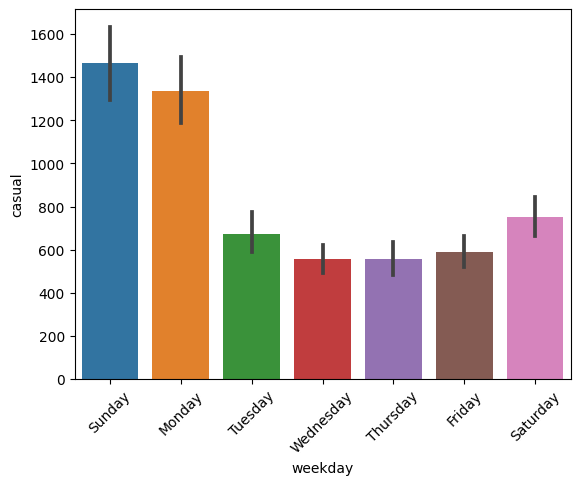

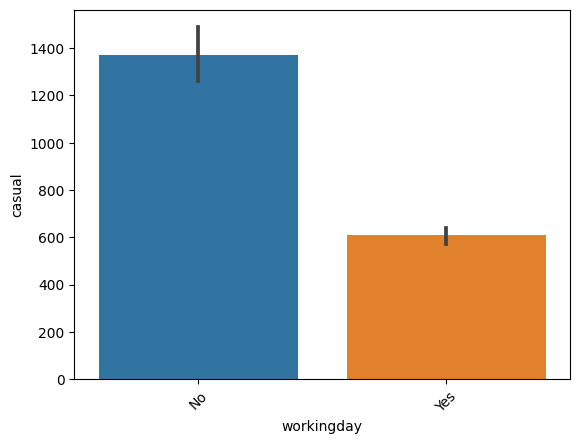

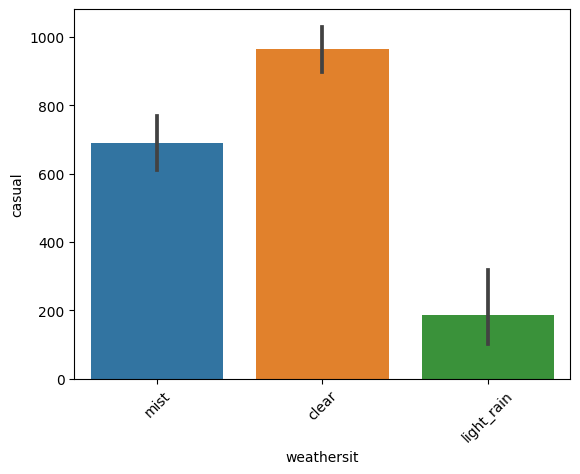

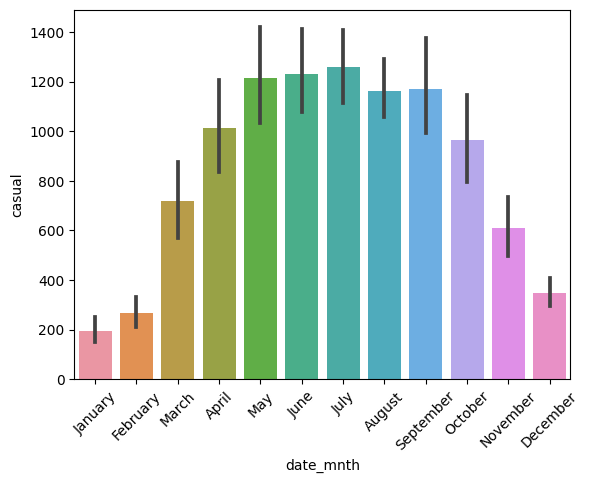

In [40]:
# Lets draw all the categorical visualizations together:
for col in df_viz.columns:
    if df_viz[col].dtype == 'object':
        sns.barplot(x=df_viz[col],y=df_viz['casual'],data=df_viz)
        plt.xticks(rotation=45)
        plt.show()

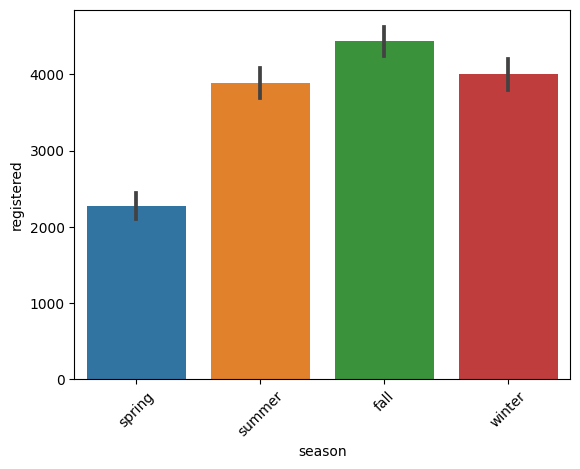

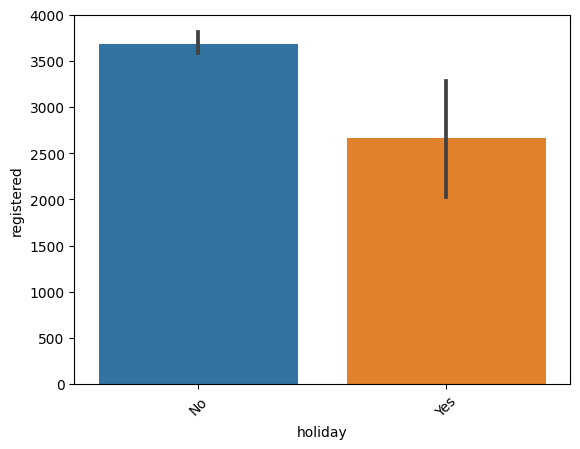

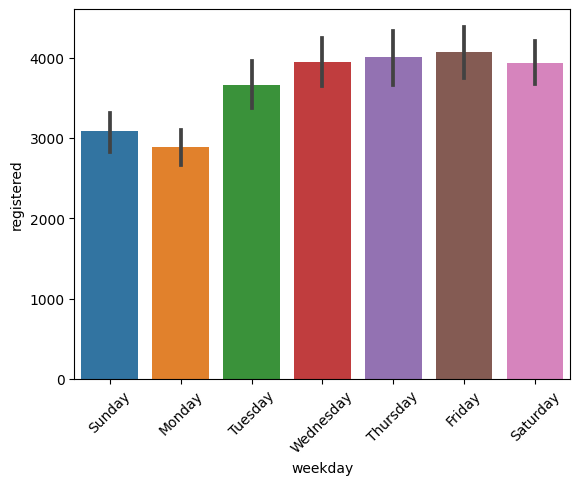

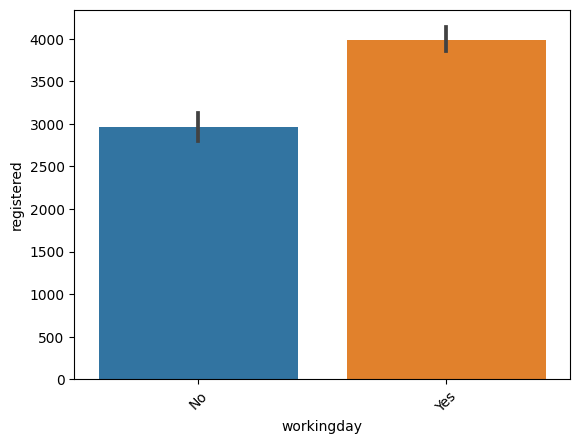

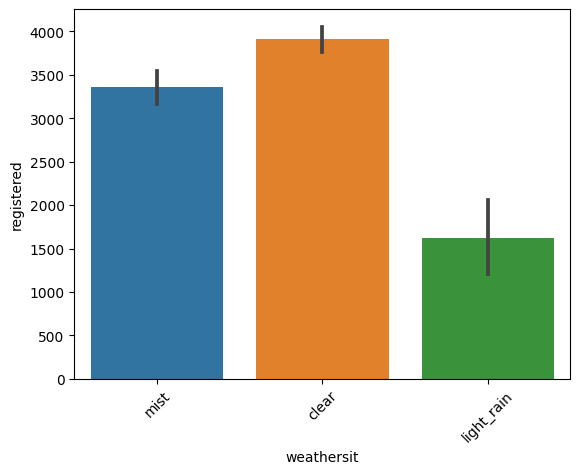

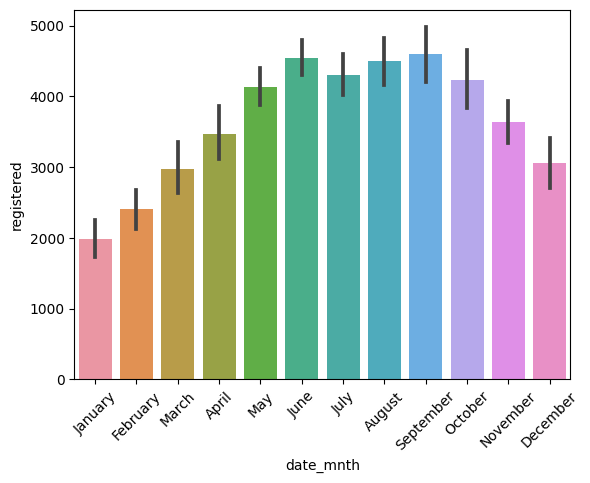

In [41]:
# Lets draw all the categorical visualizations together:
for col in df_viz.columns:
    if df_viz[col].dtype == 'object':
        sns.barplot(x=df_viz[col],y=df_viz['registered'],data=df_viz)
        plt.xticks(rotation=45)
        plt.show()

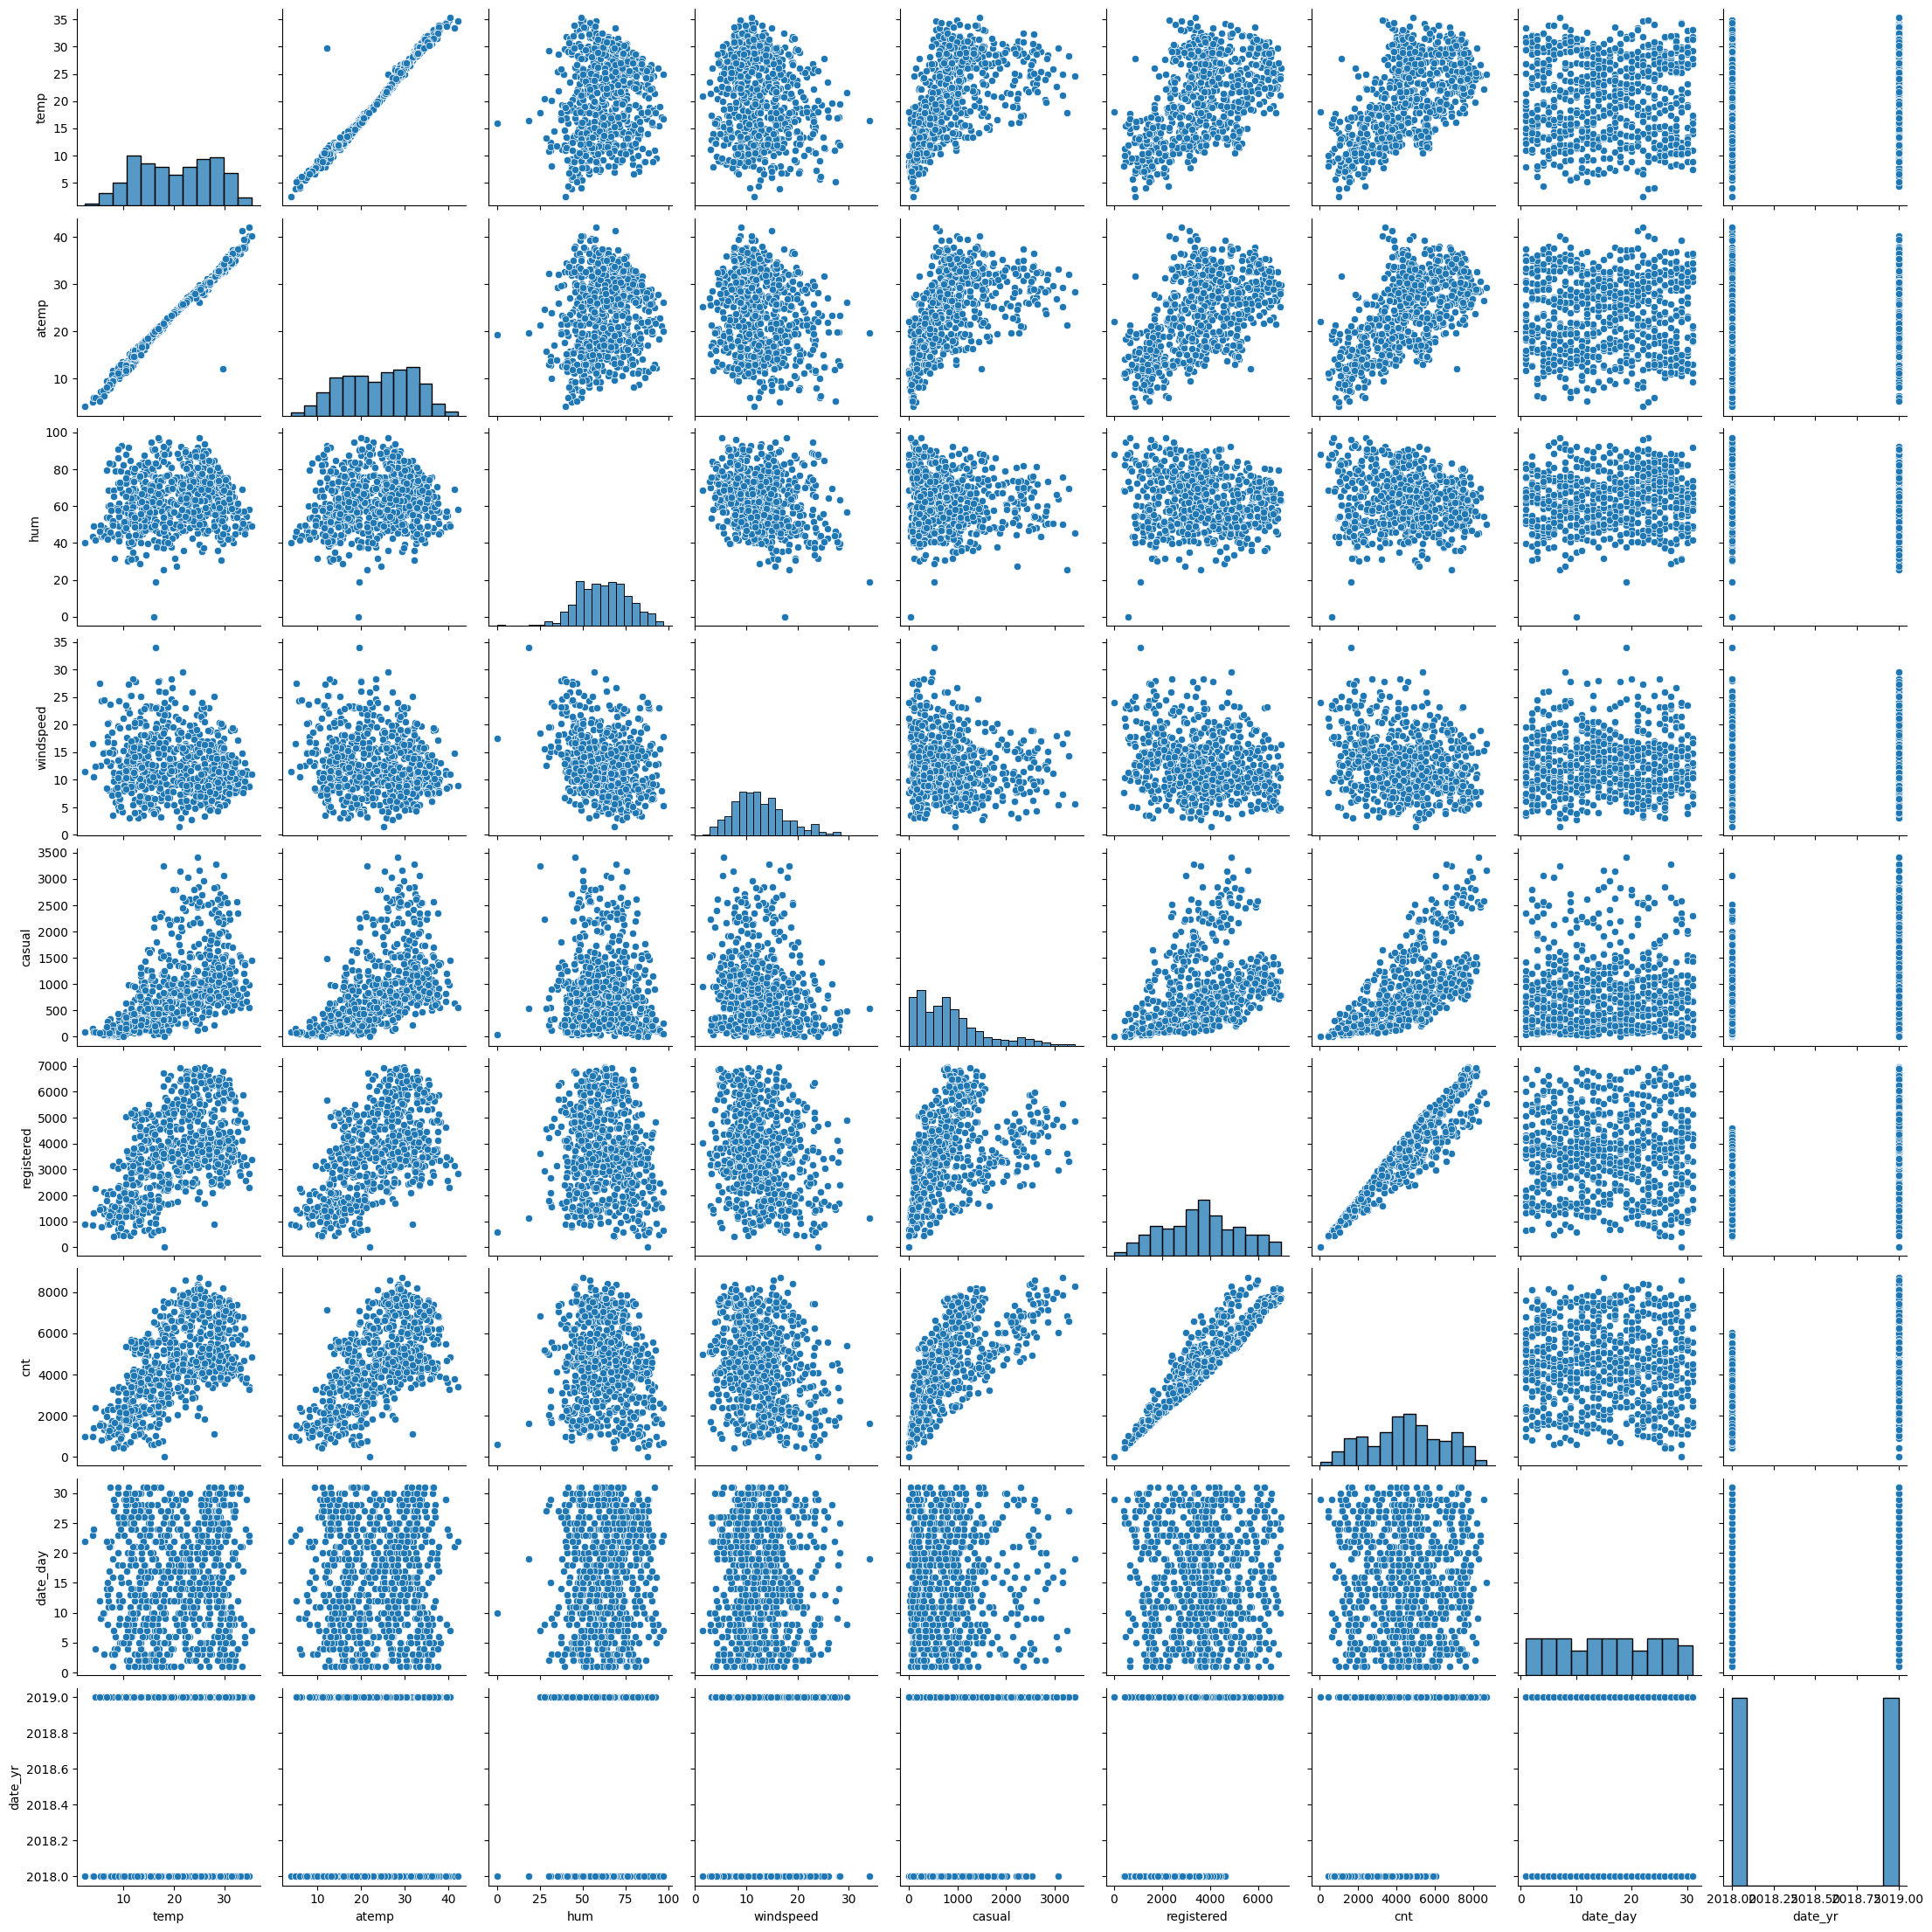

In [42]:
# Lets also check how the numeric columns are correlated and how they contribute to count:
sns.pairplot(df_viz)
plt.show()

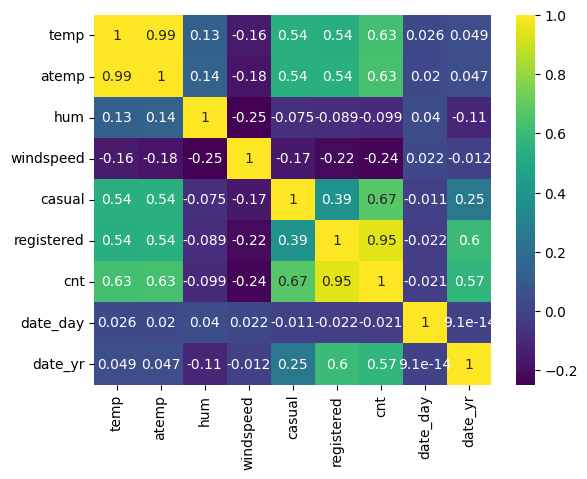

In [43]:
# Also lets draw a heatmap for better understanding and also to understand whether there is any multi-colinearity among the attributes:
sns.heatmap(df_viz.corr(),annot=True,cmap='viridis')
plt.show()

From the heatmap we can see that: <br>
1. temp and atemp columns are highly correlated. So, we can drop anyone of them.
2. Also, cnt and registered columns are highly correlated. however, registered and casual columns are going to be dropped anyways due to other reasons discussed below. The other reason is basically we want to see what factors affect the riders and therefore are not considering riders to be attributes affecting the final total number of riders.

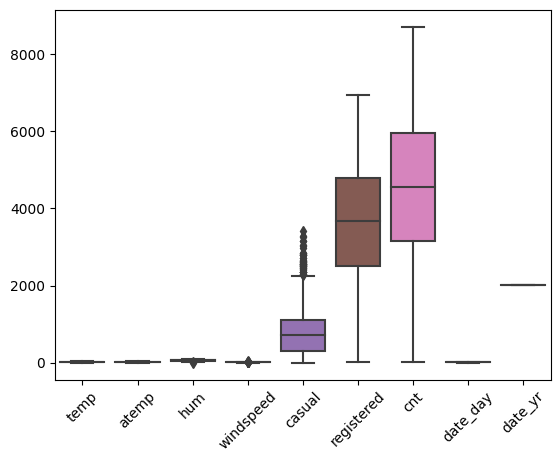

In [44]:
# Checking for outliers if any:  
sns.boxplot(df_viz)
plt.xticks(rotation=45)
plt.show()

Checking for outliers is important since 'Linear regression modesls' are heavily affected by outliers.

Note:<br>
From the above boxplot we can see that there are outliers in the casual column.
However, since we are building the model to predict the count based on other attributes cnt column is therefore our target
column. Count = casual + registered. Also, casual and registered in some other cases can also be individually considered as 
target coulmns. Therfore, in our case here we are considering other important attributes and dropping casual and registered.
Since 'casual' column will be dropped the column with the most outliers is also handled. So, no need to further handle outliers.

### For Model Building to predict number of users based on important parameters ###

In [45]:
# Since we are using the main df for model building, based on the visualizations and understanding from the above EDA 
# lets proceed with first feature elimination:

In [46]:
# Dropping unnecessary columns:
df = df.drop(['casual', 'registered','atemp'],axis=1) 

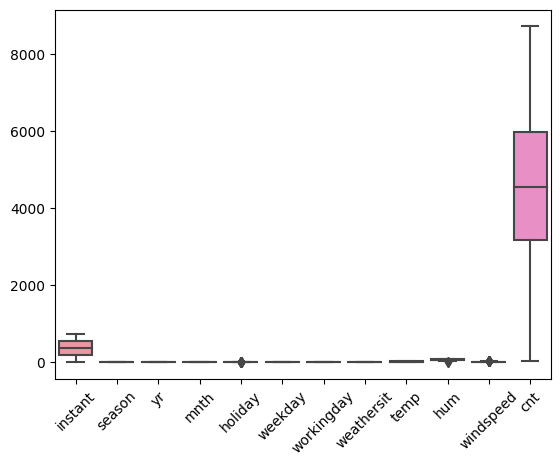

In [47]:
# checking for outliers again:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

No outliers. Good to proceed.

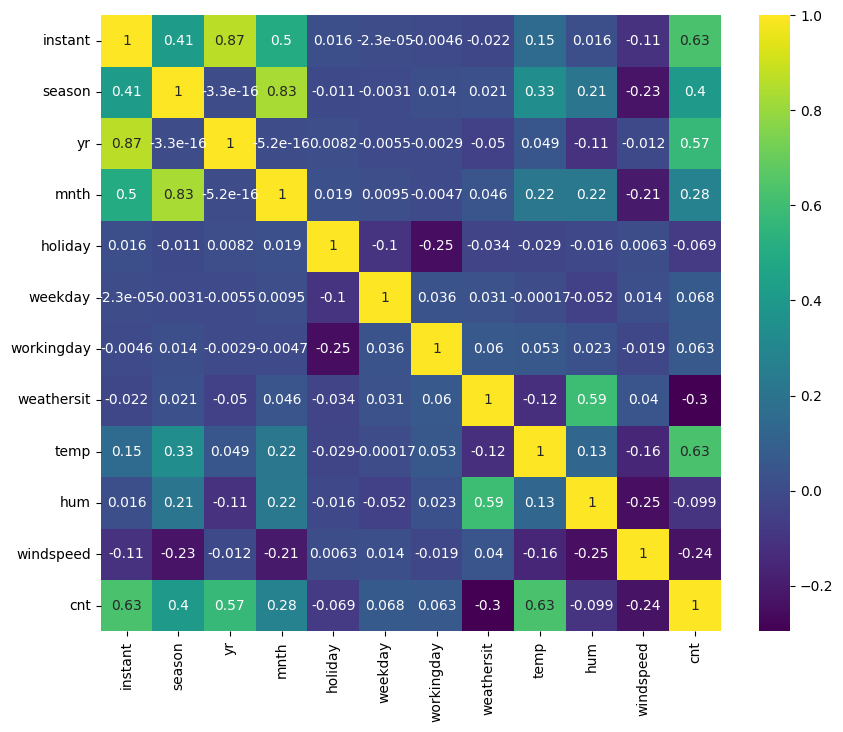

In [48]:
# checking for the multi-colinearity again:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

Thumb rule for multi-colinearity removal:<br>
Any correlation value more than 0.7 needs to be addressed. In this case: <br>
1. yr vs instant
2. mnth vs season

so, need to remove one from each of the cases.

In [49]:
# Lets remove yr and mnth: (These are good for time-series analysis. for linear regression we can comfortably drop them):
df = df.drop(['yr','mnth'],axis=1) 

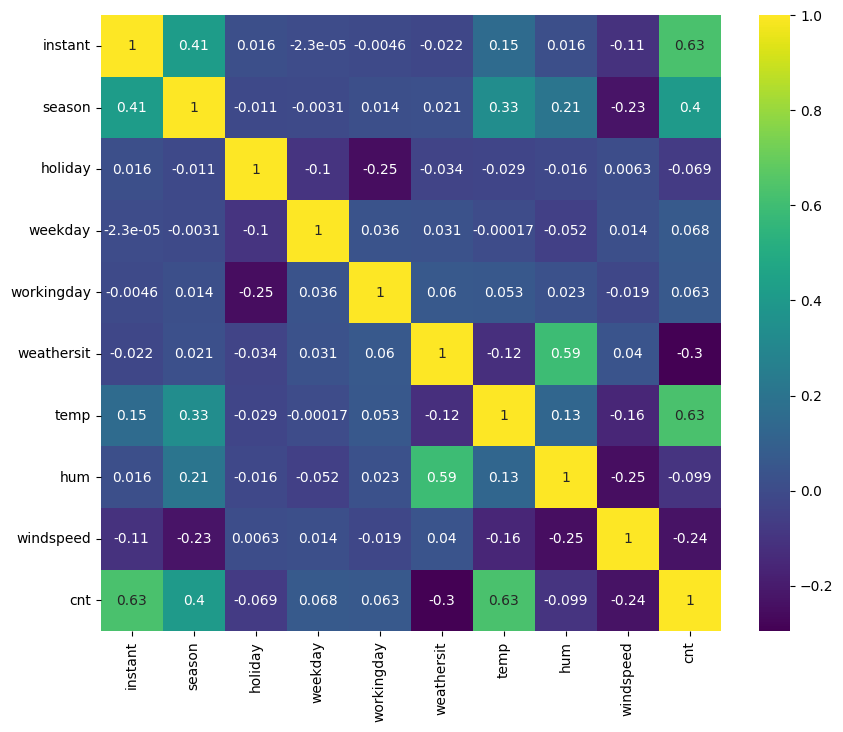

In [50]:
# checking for the multi-colinearity again:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

Everything now seems good.

In [51]:
# Checking for data type and non-values if any:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   holiday     730 non-null    int64         
 4   weekday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   temp        730 non-null    float64       
 8   hum         730 non-null    float64       
 9   windspeed   730 non-null    float64       
 10  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 62.9 KB


In [52]:
# Now lets drop the dteday column: (Checked above. There was multi-colinearity with the yr and mnth from date)
# Also datetime format is not accepted in the .fit method in linear_regression() module.
df = df.drop(['dteday'],axis=1)

In [53]:
# Label Encoding:
# Since the data has already been label encoded no need of this step here.

In [54]:
# importing vif library: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removal of outliers using VIF (Variance Inflation Factor) to avoid multi-colinearity:
# Select only numeric columns (excluding 'cnt')
col_list = df.select_dtypes(include=[np.number]).columns.tolist()
if 'cnt' in col_list:
    col_list.remove('cnt')

# Subset the dataframe
x = df[col_list]

# Compute VIF
vif_df = pd.DataFrame()
vif_df['features'] = x.columns
vif_df['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_df

,features,vif
0,instant,4.706642
1,season,8.435037
2,holiday,1.097953
3,weekday,3.094718
4,workingday,3.258958
5,weathersit,13.019112
6,temp,9.241570
7,hum,25.338350
8,windspeed,5.263885


In [55]:
df = df.drop(['hum'],axis=1)

In [56]:
col_list = df.select_dtypes(include=[np.number]).columns.tolist()
if 'cnt' in col_list:
    col_list.remove('cnt')

# Subset the dataframe
x = df[col_list]

# Compute VIF
vif_df = pd.DataFrame()
vif_df['features'] = x.columns
vif_df['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_df

,features,vif
0,instant,4.702225
1,season,7.898999
2,holiday,1.091019
3,weekday,3.079934
4,workingday,3.221087
5,weathersit,6.148773
6,temp,7.663346
7,windspeed,5.223941


In [57]:
df = df.drop(['season'],axis=1)

In [58]:
col_list = df.select_dtypes(include=[np.number]).columns.tolist()
if 'cnt' in col_list:
    col_list.remove('cnt')

# Subset the dataframe
x = df[col_list]

# Compute VIF
vif_df = pd.DataFrame()
vif_df['features'] = x.columns
vif_df['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_df

,features,vif
0,instant,3.791927
1,holiday,1.090447
2,weekday,3.070651
3,workingday,3.214123
4,weathersit,5.875573
5,temp,6.096912
6,windspeed,5.209016


In [59]:
# df = df.drop(['temp'],axis=1)

In [60]:
# col_list = df.select_dtypes(include=[np.number]).columns.tolist()
# if 'cnt' in col_list:
#     col_list.remove('cnt')

# # Subset the dataframe
# x = df[col_list]

# # Compute VIF
# vif_df = pd.DataFrame()
# vif_df['features'] = x.columns
# vif_df['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# vif_df

In [61]:
# Good enough to proceed

In [62]:
# Assigning x and y:
x = df.drop(['cnt'],axis=1) 
y = df['cnt']

In [63]:
x.shape,y.shape

((730, 7), (730,))

In [64]:
x

,instant,holiday,weekday,workingday,weathersit,temp,windspeed
0,1,0,6,0,2,14.110847,10.749882
1,2,0,0,0,2,14.902598,16.652113
2,3,0,1,1,1,8.050924,16.636703
3,4,0,2,1,1,8.200000,10.739832
4,5,0,3,1,1,9.305237,12.522300
5,6,0,4,1,1,8.378268,6.000868
6,7,0,5,1,2,8.057402,11.304642
7,8,0,6,0,2,6.765000,17.875868
8,9,0,0,0,1,5.671653,24.250650
9,10,0,1,1,1,6.184153,14.958889


In [65]:
y

0       985
1       801
2      1349
3      1562
4      1600
5      1606
6      1510
7       959
8       822
9      1321
10     1263
11     1162
12     1406
13     1421
14     1248
15     1204
16     1000
17      683
18     1650
19     1927
20     1543
21      981
22      986
23     1416
24     1985
25      506
26      431
27     1167
28     1098
29     1096
30     1501
31     1360
32     1526
33     1550
34     1708
35     1005
36     1623
37     1712
38     1530
39     1605
40     1538
41     1746
42     1472
43     1589
44     1913
45     1815
46     2115
47     2475
48     2927
49     1635
50     1812
51     1107
52     1450
53     1917
54     1807
55     1461
56     1969
57     2402
58     1446
59     1851
60     2134
61     1685
62     1944
63     2077
64      605
65     1872
66     2133
67     1891
68      623
69     1977
70     2132
71     2417
72     2046
73     2056
74     2192
75     2744
76     3239
77     3117
78     2471
79     2077
80     2703
81     2121
82     1865
83  

In [66]:
# Splitting into train and test:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.82,random_state=43)

In [67]:
x_train.shape

(598, 7)

In [68]:
y_train.shape

(598,)

In [69]:
x_test.shape, y_test.shape

((132, 7), (132,))

In [70]:
# Model instance creation:
from sklearn.linear_model import LinearRegression
li_model = LinearRegression()

In [71]:
# Model fitting to train data:
li_model.fit(x_train, y_train) 

LinearRegression()

In [72]:
y_pred = li_model.predict(x_test) 

In [73]:
y_pred

array([4117.19487201, 4906.79400373, 4953.42408477, 5197.63435278,
       4314.62957341, 2792.64227974, 1131.46692586, 1257.18554609,
       1448.17184091, 6274.74077505, 4641.70866091, 6431.83061066,
       5067.29135563, 3932.31249128, 5108.34612892, 4043.32382629,
       7668.17576652, 4073.01066685, 4182.03181664, 3910.62455853,
       7203.11122233, 4764.85398193, 6570.92580211, 5482.26015048,
       5545.63150334, 3325.47730255, 4068.41773833, 5870.21393234,
       3741.72722409, 6976.30847651, 3450.2545847 , 7470.95394612,
       4304.38897423, 3845.27533465, 4829.56305027, 6969.10957732,
       5595.77179007, 7612.56758053, 3832.35963469, 5802.72593113,
       7431.3013704 , 1690.19404849, 3849.07275402, 1752.54558066,
       3358.54362934, 7437.04357872, 3301.96079562, 4021.45578122,
       4966.10321785, 3264.79033132, 6663.55835991, 5386.426598  ,
       4641.12536423, 4216.22408314, 3431.39595444, 4849.62569912,
       1329.79956965, 4072.08934019, 2796.04790425, 5001.92130

In [74]:
y_test

335    3940
683    5445
435    5298
721    1787
388    4339
373    2376
11     1162
105     795
67     1891
555    6290
722     920
647    7691
234    5895
183    4649
180    5515
426    4066
572    6904
433    4118
441    5892
374    3598
557    7446
480    5026
613    6203
489    6883
205    3840
344    2743
288    5041
684    5698
143    4492
524    7498
249    1996
535    6211
276    4456
127    4333
700    4649
588    6544
221    4780
563    5713
128    4362
504    7129
553    4672
88     1536
425    3194
94     1795
347    3740
612    7112
349    3577
454    6235
720    1749
313    2933
523    7736
676    5315
230    4153
293    4304
409    3922
176    5305
38     1530
342    3620
339    2594
462    5169
427    3423
685    5629
283    4563
311    4205
287    5217
669    5986
353    3750
220    4602
624    6869
19     1927
699    5191
450    5102
57     2402
648    7570
380    2298
580    6824
471    6691
91     2252
333    3613
419    3487
47     2475
658    6824
562    6786
351 

In [75]:
# Lets see how well the model is able to predict:
model_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
model_predict

,Actual,Predicted
335,3940,4117.194872
683,5445,4906.794004
435,5298,4953.424085
721,1787,5197.634353
388,4339,4314.629573
373,2376,2792.642280
11,1162,1131.466926
105,795,1257.185546
67,1891,1448.171841
555,6290,6274.740775


In [76]:
# Lets check the accuracy score:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7122360016653937


In [77]:
# Not that bad. 

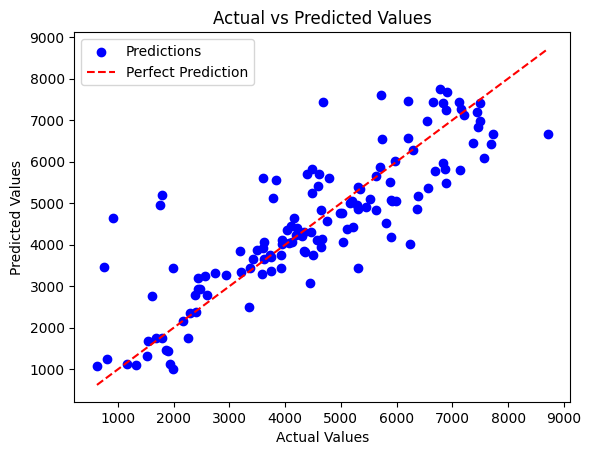

In [78]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label="Predictions")

# Add a perfect prediction reference line (y = x)
line_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line_range, line_range, color='red', linestyle='dashed', label="Perfect Prediction")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()